# import all necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
#load the data
data = pd.read_csv("advertising.csv")

In [3]:
#data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
data.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [7]:
#to find the relation between the variables
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [8]:
#check if there is any missing values in data
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

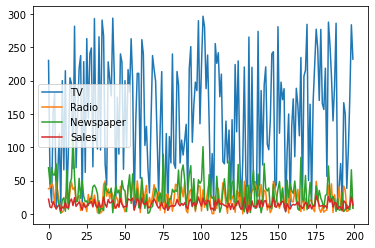

In [9]:
data.plot()

In [10]:
#boxplot is made to see if there are any outliers in the variables
#only newspaper is having outliers

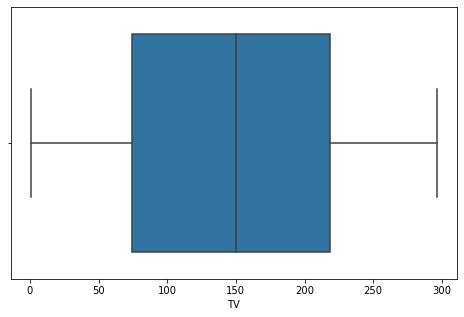

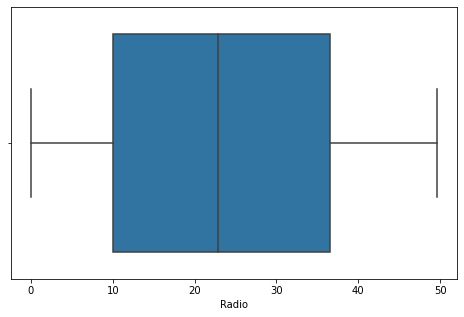

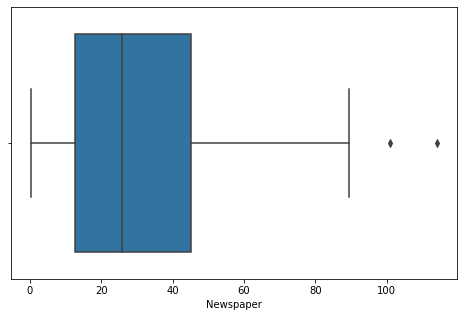

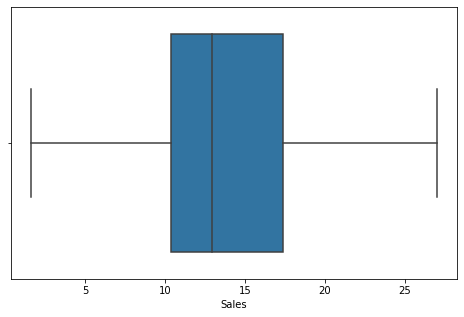

In [11]:
for col in data.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(data[col])

In [12]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


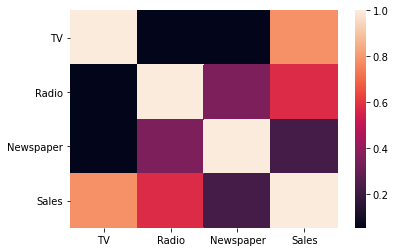

In [13]:
sns.heatmap(data.corr())

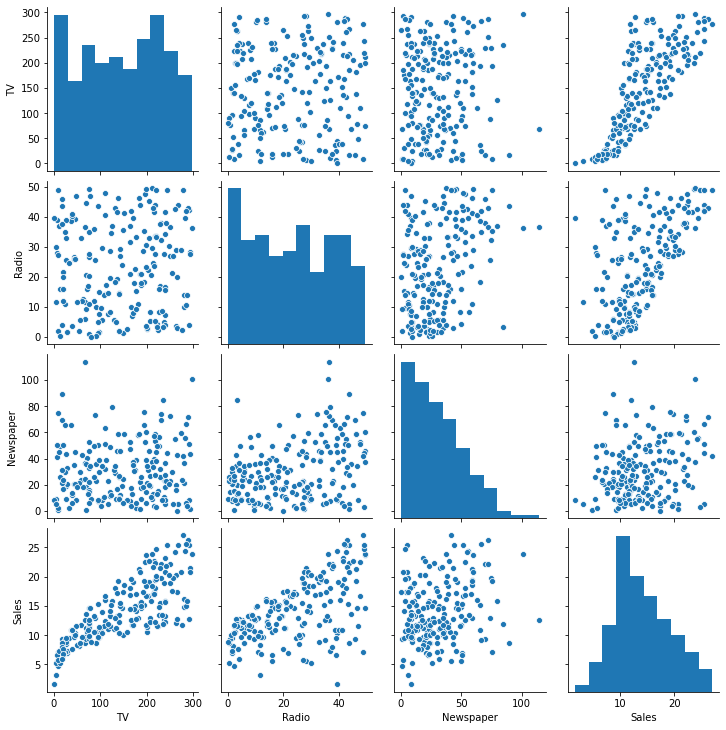

In [14]:
sns.pairplot(data)
plt.show()

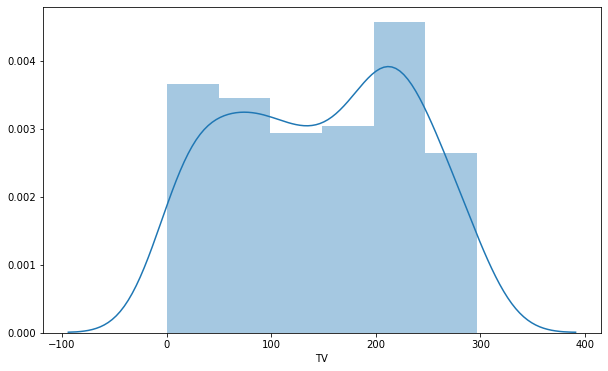

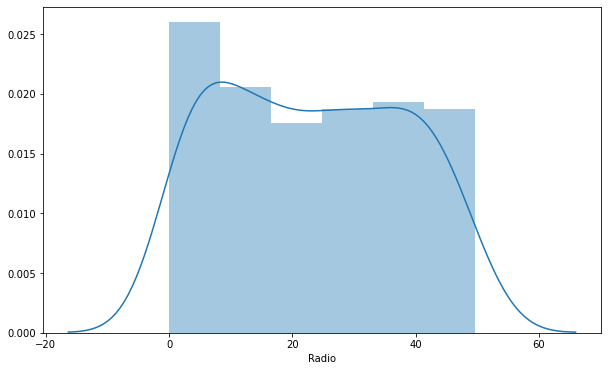

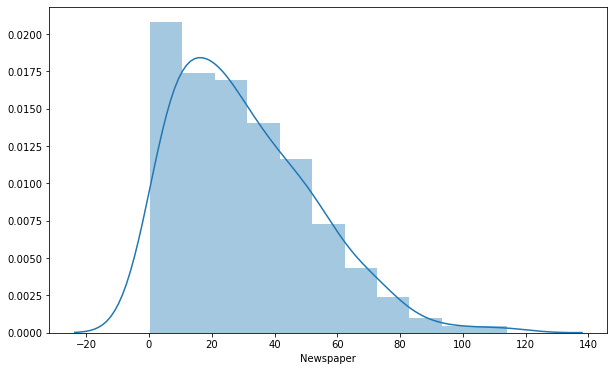

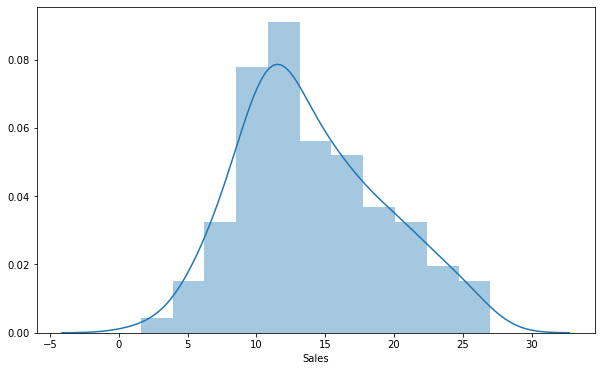

In [15]:
for col in data.columns:
    plt.figure(figsize=(10,6))
    sns.distplot(data[col])

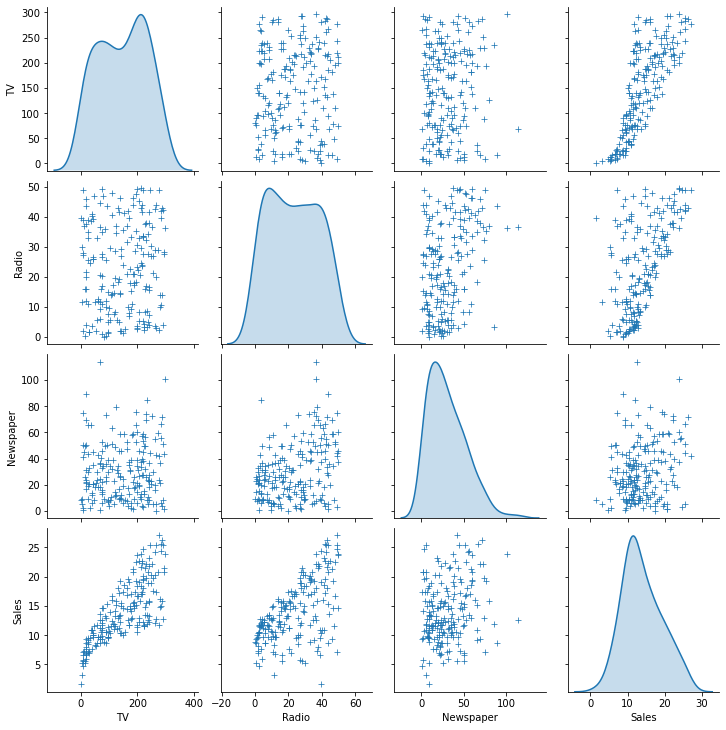

In [16]:
sns.pairplot(data, markers="+", diag_kind="kde")
plt.show()

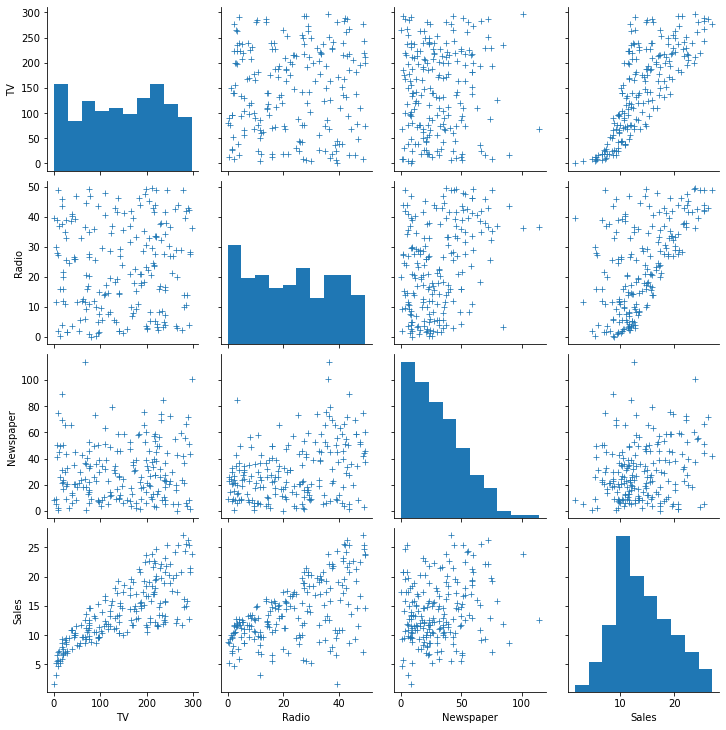

In [17]:
sns.pairplot(data, markers="+", diag_kind="hist")
plt.show()

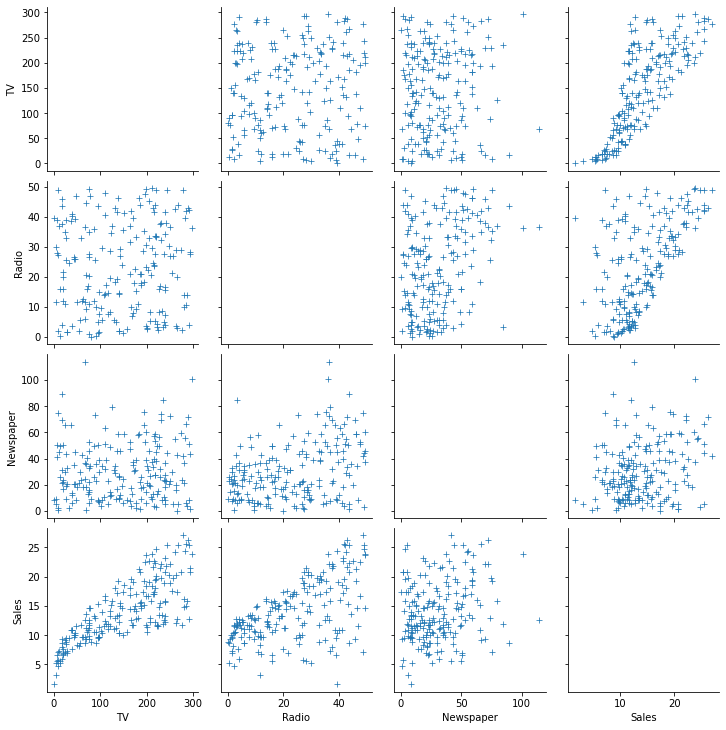

In [18]:
sns.pairplot(data, markers="+", diag_kind="scatter")
plt.show()

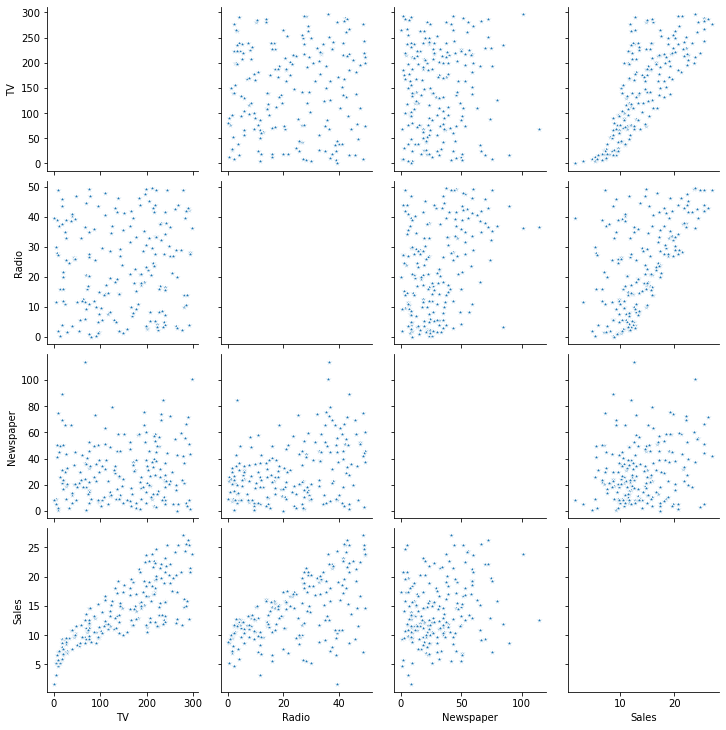

In [19]:
sns.pairplot(data, markers="*", diag_kind="reg")
plt.show()

In [20]:
X = data.drop('Sales',axis=1)

In [21]:
data.Sales.describe()

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: Sales, dtype: float64

In [22]:
#splitting of the dataset
#X = tv,newspaper,radio
#Y = sales

In [23]:
Y = data[['Sales']]

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [25]:
lr =LinearRegression()

In [26]:
lr.fit(X_train,Y_train)

LinearRegression()

In [27]:
lr.intercept_


array([2.81727514])

In [28]:
lr.coef_

array([[0.0455864 , 0.18569816, 0.00223281]])

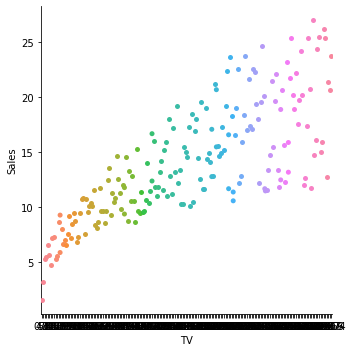

In [29]:
sns.catplot(x='TV',y='Sales',data=data,kind='swarm')
plt.show()


In [30]:
q = data.Sales.describe()
print(q)
IQR    = q['75%'] - q['25%']
Upper  = q['75%'] + 1.5 * IQR
Lower  = q['25%'] - 1.5 * IQR
print("the upper and lower outliers are {} and {}".format(Upper,Lower))

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: Sales, dtype: float64
the upper and lower outliers are 27.937499999999996 and -0.16249999999999787


In [31]:
def calculateModel(real, predict):
    rmse = np.sqrt(mean_squared_error(real, predict)) 
    r2 = r2_score(real, predict) 
    print("rmse:",rmse) 
    print("r2 score:",r2)

In [32]:
print("Random Forest Regressor")
print("------------")
rf = RandomForestRegressor(random_state=0).fit(X_train, Y_train)
rf_pred = rf.predict(X_train)
print("Train set of RF")
calculateModel(Y_train,rf_pred)

Random Forest Regressor
------------


<ipython-input-32-beee99e0499c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(random_state=0).fit(X_train, Y_train)


Train set of RF
rmse: 0.29919389616100106
r2 score: 0.996836198594463
